In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1,inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
df = df.drop_duplicates(keep='first')

In [8]:
df.duplicated().sum()

0

In [9]:
df.sample(3)

,v1,v2
3636,ham,You know what hook up means right?
5384,ham,How are you babes. Hope your doing ok. I had a...
1497,ham,I'm putting it on now. It should be ready for ...


In [10]:
df.rename(columns ={
    'v1':'target',
    'v2':'text'
},inplace=True)

C:\Users\Patil\AppData\Local\Temp\ipykernel_6884\1171772526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns ={


In [11]:
df.sample(3)

,target,text
440,ham,Yes..he is really great..bhaji told kallis bes...
5007,ham,Go fool dont cheat others ok
2055,ham,"Sir, I am waiting for your mail."


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

C:\Users\Patil\AppData\Local\Temp\ipykernel_6884\596821265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = le.fit_transform(df['target'])


In [13]:
df.shape

(5169, 2)

In [14]:
df[df['target'] == 0].value_counts().sum()

4516

In [15]:
df[df['target'] == 1].value_counts().sum()

653

In [16]:
l = [4516,653]

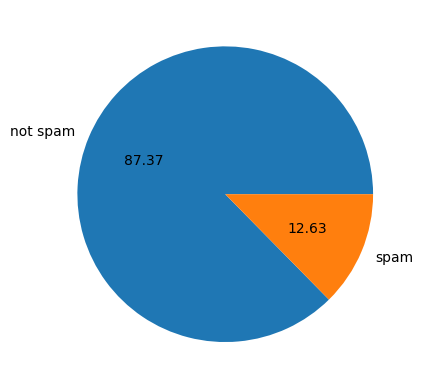

In [17]:
plt.pie(l,labels=['not spam','spam'],autopct='%0.2f')
plt.show()

In [18]:
df.head(1)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit_transform(df['text']).toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
import nltk

In [64]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
df['num_characters'] = df['text'].apply(len)

C:\Users\Patil\AppData\Local\Temp\ipykernel_6884\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [66]:
df.head(1)

,target,text,num_characters,num_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...


In [67]:
df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Patil\AppData\Local\Temp\ipykernel_6884\3973056924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [68]:
df.head(1)

,target,text,num_characters,num_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...


In [69]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Patil\AppData\Local\Temp\ipykernel_6884\2446049213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [70]:
df.head(3)

,target,text,num_characters,num_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [71]:
df[['num_characters','num_word','num_sentence']].describe()

,num_characters,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [72]:
df[df['target'] == 0][['num_characters','num_word','num_sentence']].describe()

,num_characters,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [73]:
df[df['target'] == 1][['num_characters','num_word','num_sentence']].describe()

,num_characters,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [74]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

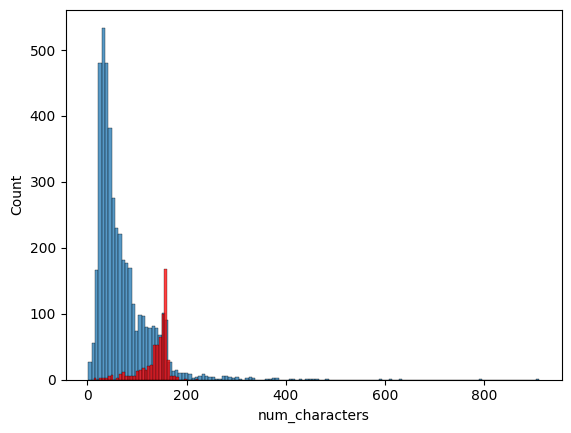

In [75]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

In [76]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
import string

In [78]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [79]:
def transformed_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

    

In [80]:
text = 'Go until jurong point, crazy.. Ava 28 ilable &  only in ! bugis n  * great world la e buffet... Cine there got amore wat...'

transformed_text(text)

'go jurong point crazi ava 28 ilabl bugi n great world la e buffet cine got amor wat'

In [104]:
df['transformed_test'] = df['text'].apply(transformed_text)

C:\Users\Patil\AppData\Local\Temp\ipykernel_6884\664263810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_test'] = df['text'].apply(transformed_text)


In [105]:
df.head()

,target,text,num_characters,num_word,num_sentence,transformed_text,transformed_text,transformed_test
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though,nah think goe usf live around though


In [114]:
df.drop('transformed_test',axis=1)

,target,text,num_characters,num_word,num_sentence,transformed_text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...,guy bitch act like interest buy someth els nex...


In [116]:
df.drop('transformed_text',axis=1,inplace=True)

C:\Users\Patil\AppData\Local\Temp\ipykernel_6884\2059292311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('transformed_text',axis=1,inplace=True)


In [117]:
df.head(3)

,target,text,num_characters,num_word,num_sentence,transformed_test
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [118]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [119]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_test'].str.cat(sep=' '))

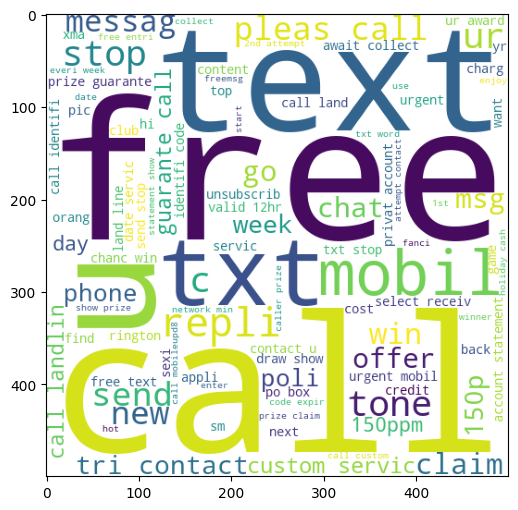

In [120]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [121]:
not_spam_wc = wc.generate(df[df['target'] == 0]['transformed_test'].str.cat(sep=' '))

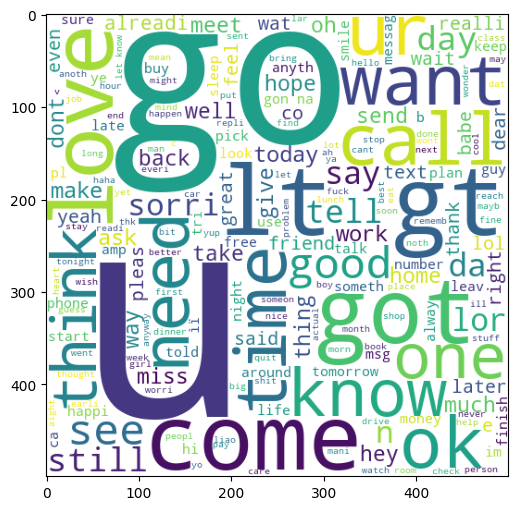

In [122]:
plt.figure(figsize=(15,6))
plt.imshow(not_spam_wc)

In [123]:
df.head()

,target,text,num_characters,num_word,num_sentence,transformed_test
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [124]:
df.head()

,target,text,num_characters,num_word,num_sentence,transformed_test
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [125]:
# df.rename(columns={
#     'transformed_test':'transformed_text'
# },inplace=True)

In [126]:
df.head()

,target,text,num_characters,num_word,num_sentence,transformed_test
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [127]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=5000)

In [129]:
X = tfidf.fit_transform(df['transformed_test']).toarray()

In [130]:
y = df['target'].values

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [132]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [133]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [134]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8597678916827853
[[779 116]
 [ 29 110]]
0.48672566371681414


In [135]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9555125725338491
[[895   0]
 [ 46  93]]
1.0


In [136]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[893   2]
 [ 33 106]]
0.9814814814814815


In [137]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [138]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
svc = SVC(gamma=1.0)

In [139]:
voting = VotingClassifier(estimators = [('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [140]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm', SVC(gamma=1.0)), ('nb', MultinomialNB()),
                             ('et', ExtraTreesClassifier())],
                 voting='soft')

In [141]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))